# Tuning dos parâmetros usando GridSearch

# Preparação dos dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV # Validação cruzada dos dados

from sklearn.tree import DecisionTreeClassifier # Árvores de decisão simples
from sklearn.ensemble import RandomForestClassifier # Random Forests
from sklearn.neighbors import KNeighborsClassifier # Algoritmo KNN
from sklearn.linear_model import LogisticRegression # Regressão Linear
from sklearn.svm import SVC # SVM
from sklearn.neural_network import MLPClassifier # Rede Neural de classificação
# Naive Bayes não existe nenhum parâmetro relevante

In [ ]:
import pickle
with open('/content/drive/MyDrive/variáveis de teste e treinamento(credit, census)/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# Verificando tamanho das variáveis
print(x_credit_treinamento.shape, y_credit_treinamento.shape)
print(x_credit_teste.shape, y_credit_teste.shape)

(1500, 3) (1500,)
(500, 3) (500,)


In [ ]:
# Concatenando as variáveis de treinamento e teste x e y

x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0) # axis = 0, para juntar as colunas e não as linhas
x_credit.shape

(2000, 3)

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [ ]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

# Árvore de decisão

In [ ]:
# Passando os parâmetros
parametros_arvore = {'criterion': ['gini', 'entropy'],
                     'splitter': ['best', 'random'],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 5, 10]
                     }

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_arvore)
grid_search_tree.fit(x_credit, y_credit)
melhores_param = grid_search_tree.best_params_
melhor_resultado = grid_search_tree.best_score_
print(f'Os melhores parâmetros são: {melhores_param}')
print(f'O melhor resultado foi: {melhor_resultado}')

Os melhores parâmetros são: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
O melhor resultado foi: 0.983


# Random Forest

In [ ]:
parametros_random = {
                    'criterion': ['gini', 'entropy'],
                    'n_estimators': [10, 40, 50, 100, 150],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [2, 5, 10]
                    }
grid_search_random = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_random)
grid_search_random.fit(x_credit, y_credit)
melhores_param = grid_search_random.best_params_
melhor_resultado = grid_search_random.best_score_
print(f'Os melhores parâmetros são: {melhores_param}')
print(f'O melhor resultado foi: {melhor_resultado}')

Os melhores parâmetros são: {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
O melhor resultado foi: 0.9865


# KNN

In [ ]:
parametros_knn = {
                    'n_neighbors': [3, 5, 10, 20],
                    'p': [1, 2]
                 }

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_search_knn.fit(x_credit, y_credit)
melhores_param = grid_search_knn.best_params_
melhor_resultado = grid_search_knn.best_score_
print(f'Os melhores parâmetros são: {melhores_param}')
print(f'O melhor resultado foi: {melhor_resultado}')

Os melhores parâmetros são: {'n_neighbors': 20, 'p': 1}
O melhor resultado foi: 0.9800000000000001


# Regressão logística

In [ ]:
parametros_regr = {
                    'tol': [0.0001, 0.00001, 0.000001],
                    'C': [1.0, 1.5, 2.0],
                    'solver': ['lbfgs', 'sag', 'saga']
                  }

grid_search_regr = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_regr)
grid_search_regr.fit(x_credit, y_credit)
melhores_param = grid_search_regr.best_params_
melhor_res = grid_search_regr.best_score_
print(f'Os melhores parâmetros são: {melhores_param}')
print(f'O melhor resultado foi: {melhor_res}')

Os melhores parâmetros são: {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
O melhor resultado foi: 0.9484999999999999


# SVM

In [ ]:
parametros_svm = {
                    'tol': [0.001, 0.0001, 0.00001],
                    'C': [1.0, 1.5, 2.0],
                    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
                 }

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_search_svm.fit(x_credit, y_credit)
melhores_param = grid_search_svm.best_params_
melhor_res = grid_search_svm.best_score_
print(f'Os melhores parâmetros são: {melhores_param}')
print(f'O melhor resultado foi: {melhor_res}')

Os melhores parâmetros são: {'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
O melhor resultado foi: 0.9829999999999999


# Redes Neurais Artificais

In [ ]:
parametros_rede_neural = {'activation': ['identity', 'logistic', 'relu', 'softmax', 'tanh'],
                          'solver': ['adam', 'sgd'],
                          'batch_size': [10, 56]}

grid_search_rede_neural = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros_rede_neural)
grid_search_rede_neural.fit(x_credit, y_credit)
melhores_param_rn = grid_search_rede_neural.best_params_
melhor_res_rn = grid_search_rede_neural.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
print(f'Os melhores parâmetros são: {melhores_param_rn}')
print(f'O melhor resultado foi: {melhor_res_rn}')

Os melhores parâmetros são: {'activation': 'tanh', 'batch_size': 10, 'solver': 'adam'}
O melhor resultado foi: 0.9970000000000001


# Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    print(i)
    # Árvore de decisão
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split = 5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
    #print(scores)
    #print(scores.mean())
    resultados_arvore.append(scores.mean())

    # Random Forest
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split =  5, n_estimators =  100)
    scores_random = cross_val_score(random_forest, x_credit, y_credit, cv = kfold)
    resultados_random.append(scores_random.mean())

    # KNN
    knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
    scores_knn = cross_val_score(knn, x_credit, y_credit, cv = kfold)
    resultados_knn.append(scores_knn.mean())

    # Logistic Regression
    logistic = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores_logistic = cross_val_score(logistic, x_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores_logistic.mean())

    # SVM
    svm = SVC(C = 1.5, kernel = 'rbf', tol = 0.001)
    scores_svm = cross_val_score(svm, x_credit, y_credit, cv = kfold)
    resultados_svm.append(scores_svm.mean())

    # Rede Neural Aritificial
    rede_neural = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
    scores_rn = cross_val_score(rede_neural, x_credit, y_credit, cv = kfold)
    resultados_rede_neural.append(scores_rn.mean())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
# Criando base de dados dos resultados
resultados = pd.DataFrame({'Árvore': resultados_arvore, 'Random Forest': resultados_random,
                           'KNN': resultados_knn, 'Regressão Logística': resultados_logistica,
                           'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados

,Árvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
0,0.9865,0.9870,0.9800,0.9475,0.9835,0.9960
1,0.9860,0.9870,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9875,0.9800,0.9470,0.9835,0.9975
3,0.9875,0.9870,0.9800,0.9460,0.9845,0.9960
4,0.9885,0.9885,0.9810,0.9465,0.9855,0.9960
5,0.9890,0.9890,0.9785,0.9465,0.9835,0.9975
6,0.9880,0.9885,0.9800,0.9470,0.9840,0.9970
7,0.9875,0.9870,0.9805,0.9480,0.9845,0.9955
8,0.9855,0.9875,0.9810,0.9465,0.9820,0.9950
9,0.9875,0.9895,0.9810,0.9465,0.9830,0.9955


In [ ]:
resultados.describe()
# STD = Desvio padrão dos resultados

,Árvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987167,0.987383,0.980200,0.946950,0.983983,0.996467
std,0.001768,0.001278,0.001270,0.000687,0.001141,0.000850
min,0.983000,0.984000,0.977500,0.945500,0.982000,0.994000
25%,0.986000,0.986500,0.979625,0.946500,0.983500,0.996000
50%,0.987250,0.987250,0.980000,0.947000,0.984000,0.996500
75%,0.988375,0.988000,0.981000,0.947500,0.984500,0.997000
max,0.990500,0.990000,0.983500,0.948500,0.987000,0.997500


In [ ]:
# Variância
resultados.var()

Árvore                 3.126437e-06
Random Forest          1.632471e-06
KNN                    1.613793e-06
Regressão Logística    4.715517e-07
SVM                    1.301437e-06
Rede Neural            7.229885e-07
dtype: float64

In [ ]:
# Coeficiente
(resultados.std() / resultados.mean()) * 100

Árvore                 0.179116
Random Forest          0.129401
KNN                    0.129601
Regressão Logística    0.072517
SVM                    0.115937
Rede Neural            0.085330
dtype: float64

# Teste de normalidade dos resultados

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9715772867202759, pvalue=0.5831776261329651),
 ShapiroResult(statistic=0.9708472490310669, pvalue=0.5626114010810852),
 ShapiroResult(statistic=0.9244037866592407, pvalue=0.0349433459341526),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9637297987937927, pvalue=0.38434284925460815),
 ShapiroResult(statistic=0.9035141468048096, pvalue=0.010247907601296902))

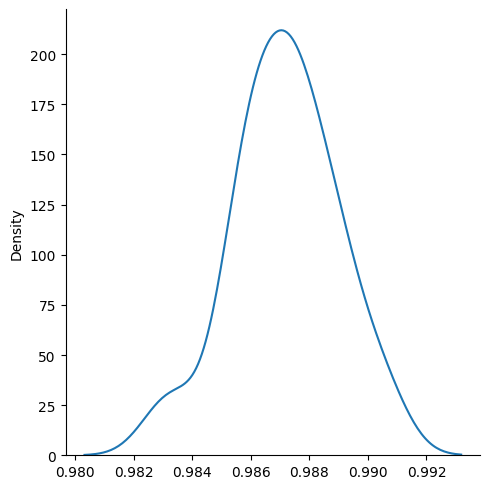

In [ ]:
sns.displot(resultados_arvore, kind = 'kde');

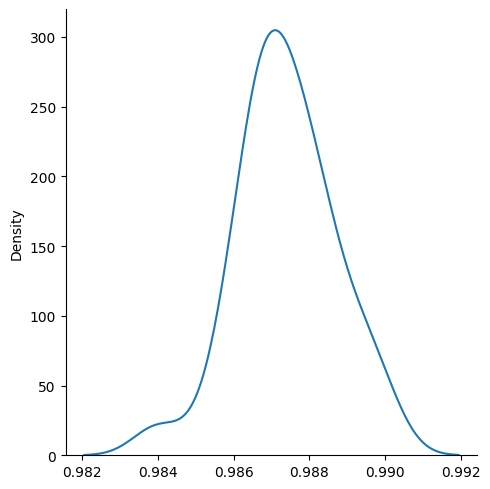

In [ ]:
sns.displot(resultados_random, kind = 'kde');

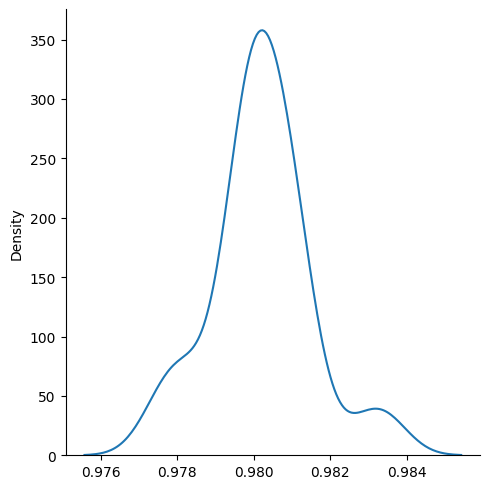

In [ ]:
sns.displot(resultados_knn, kind = 'kde');

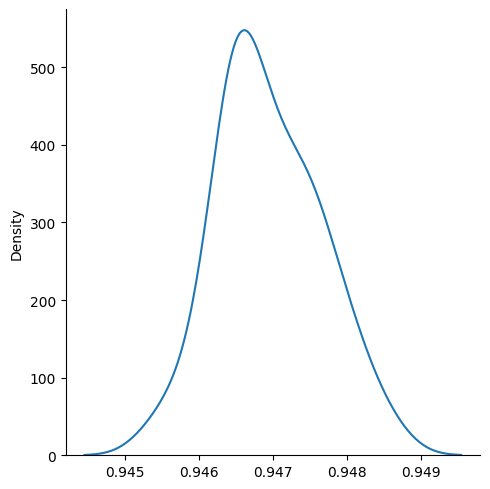

In [ ]:
sns.displot(resultados_logistica, kind = 'kde');

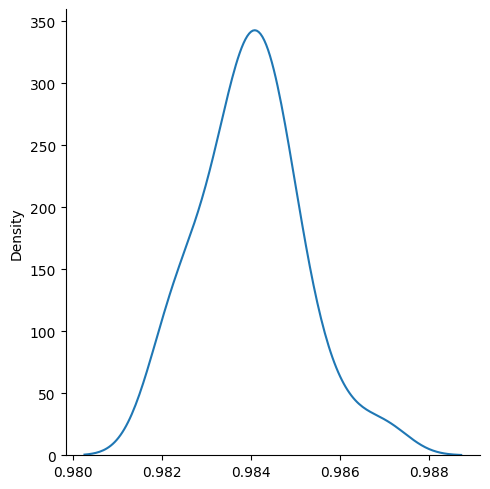

In [ ]:
sns.displot(resultados_svm, kind = 'kde');

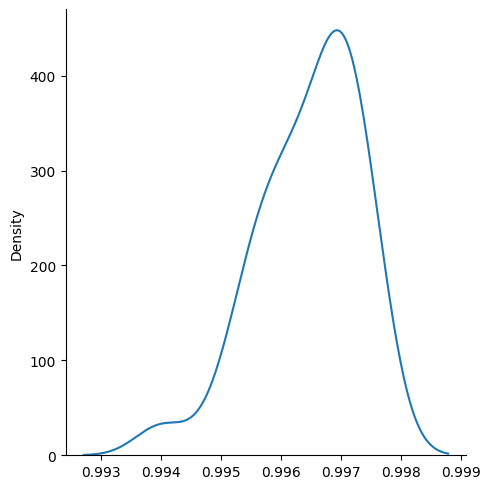

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');

# Teste de hipóteste com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

6.758659728708351e-193

In [ ]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes.')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais.')

Hipótese nula rejeitada. Dados são diferentes.


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9860,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9955,rede_neural
176,0.9970,rede_neural
177,0.9975,rede_neural
178,0.9960,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   -0.007    0.0 -0.0079 -0.0061   True
       arvore     logistica  -0.0402    0.0 -0.0411 -0.0393   True
       arvore random_forest   0.0002 0.9828 -0.0007  0.0011  False
       arvore   rede_neural   0.0093    0.0  0.0084  0.0102   True
       arvore           svm  -0.0032    0.0 -0.0041 -0.0023   True
          knn     logistica  -0.0333    0.0 -0.0342 -0.0323   True
          knn random_forest   0.0072    0.0  0.0063  0.0081   True
          knn   rede_neural   0.0163    0.0  0.0154  0.0172   True
          knn           svm   0.0038    0.0  0.0029  0.0047   True
    logistica random_forest   0.0404    0.0  0.0395  0.0413   True
    logistica   rede_neural   0.0495    0.0  0.0486  0.0504   True
    logistica           svm    0.037    0.0  0.0361  0.0379   

In [ ]:
resultados.mean()

Árvore                 0.987167
Random Forest          0.987383
KNN                    0.980200
Regressão Logística    0.946950
SVM                    0.983983
Rede Neural            0.996467
dtype: float64

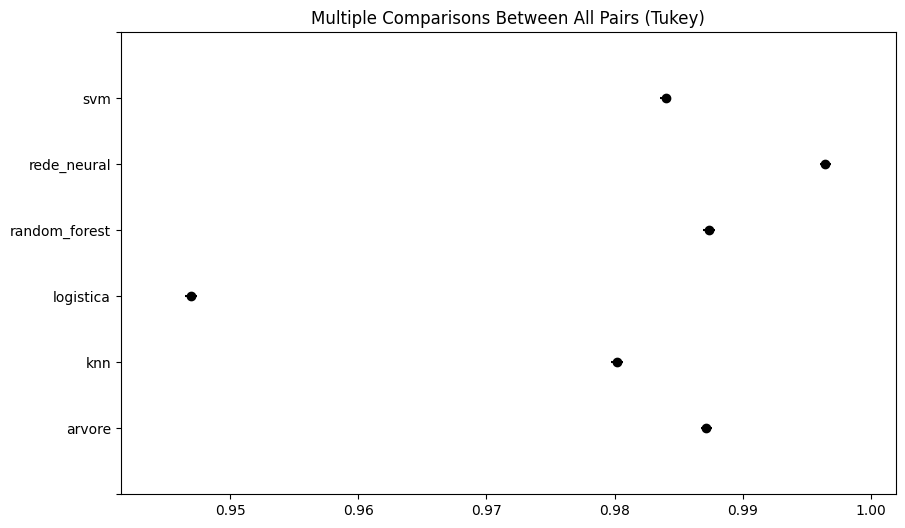

In [ ]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [4]:
import pickle

In [5]:
with open('/content/drive/MyDrive/variáveis de teste e treinamento(credit, census)/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [6]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [7]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [9]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [10]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [11]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [12]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [14]:
rede_neural = pickle.load(open('/content/drive/MyDrive/classificadores treinados/rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('/content/drive/MyDrive/classificadores treinados/arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('/content/drive/MyDrive/classificadores treinados/svm_finalizado.sav', 'rb'))

In [15]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [16]:
novo_registro.shape

(3,)

In [17]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [18]:
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [19]:
rede_neural.predict(novo_registro)

array([1])

In [20]:
arvore.predict(novo_registro)

array([1])

In [21]:
svm.predict(novo_registro)

array([1])